# EDA Springleaf

In [2]:
import os
import numpy as np
import pandas as pd 
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import seaborn

In [39]:
def autolabel(arrayA):
    ''' label each colored square with the corresponding data value. 
    If value > 20, the text is in black, else in white.
    '''
    arrayA = np.array(arrayA)
    for i in range(arrayA.shape[0]):
        for j in range(arrayA.shape[1]):
                plt.text(j,i, "%.2f"%arrayA[i,j], ha='center', va='bottom',color='w')

def hist_it(feat):
    plt.figure(figsize=(16,4))
    feat[Y_train==0].hist(bins=range(int(feat.min()),int(feat.max()+2)),normed=True,alpha=0.8)
    feat[Y_train==1].hist(bins=range(int(feat.min()),int(feat.max()+2)),normed=True,alpha=0.5)
    plt.ylim((0,1))
    
def gt_matrix(feats,sz=16):
    a = []
    for i,c1 in enumerate(feats):
        b = [] 
        for j,c2 in enumerate(feats):
            mask = (~X_train[c1].isnull()) & (~X_train[c2].isnull())
            if i>=j:
                b.append((X_train.loc[mask,c1].values>=X_train.loc[mask,c2].values).mean())
            else:
                b.append((X_train.loc[mask,c1].values>X_train.loc[mask,c2].values).mean())

        a.append(b)

    plt.figure(figsize = (sz,sz))
    plt.imshow(a, interpolation = 'None')
    _ = plt.xticks(range(len(feats)),feats,rotation = 90)
    _ = plt.yticks(range(len(feats)),feats,rotation = 0)
    autolabel(a)

In [4]:
def hist_it1(feat):
    plt.figure(figsize=(16,4))
    feat[Y==0].hist(bins=100,range=(feat.min(),feat.max()),normed=True,alpha=0.5)
    feat[Y==1].hist(bins=100,range=(feat.min(),feat.max()),normed=True,alpha=0.5)
    plt.ylim((0,1))

# Load Data

In [5]:
train_raw = pd.read_csv('../../dataset/springleaf/train.csv.zip')
train_target_raw = train_raw.target
train_raw.head()

,ID,VAR_0001,VAR_0002,VAR_0003,VAR_0004,VAR_0005,VAR_0006,VAR_0007,VAR_0008,VAR_0009,...,VAR_1926,VAR_1927,VAR_1928,VAR_1929,VAR_1930,VAR_1931,VAR_1932,VAR_1933,VAR_1934,target
0,2,H,224,0,4300,C,0.0,0.0,False,False,...,98,98,998,999999998,998,998,9998,9998,IAPS,0
1,4,H,7,53,4448,B,1.0,0.0,False,False,...,98,98,998,999999998,998,998,9998,9998,IAPS,0
2,5,H,116,3,3464,C,0.0,0.0,False,False,...,98,98,998,999999998,998,998,9998,9998,IAPS,0
3,7,H,240,300,3200,C,0.0,0.0,False,False,...,98,98,998,999999998,998,998,9998,9998,RCC,0
4,8,R,72,261,2000,N,0.0,0.0,False,False,...,98,98,998,999999998,998,998,9998,9998,BRANCH,1


In [6]:
test_raw = pd.read_csv('../../dataset/springleaf/test.csv.zip')
test_ID = test_raw.ID
test_raw.head()

,ID,VAR_0001,VAR_0002,VAR_0003,VAR_0004,VAR_0005,VAR_0006,VAR_0007,VAR_0008,VAR_0009,...,VAR_1925,VAR_1926,VAR_1927,VAR_1928,VAR_1929,VAR_1930,VAR_1931,VAR_1932,VAR_1933,VAR_1934
0,1,R,360,25,2251,B,2.0,2.0,False,False,...,0,98,98,998,999999998,998,998,9998,9998,IAPS
1,3,R,74,192,3274,C,2.0,3.0,False,False,...,0,98,98,998,999999998,998,998,9998,9998,IAPS
2,6,R,21,36,3500,C,1.0,1.0,False,False,...,0,98,98,998,999999998,998,998,9998,9998,IAPS
3,9,R,8,2,1500,B,0.0,0.0,False,False,...,0,98,98,998,999999998,998,998,9998,9998,IAPS
4,10,H,91,39,84500,C,8.0,3.0,False,False,...,0,98,98,998,999999998,998,998,9998,9998,IAPS


# Explore Data

Probably the first thing you check is the shapes of the train and test matrices and look inside them.

In [7]:
print('Train shape', train_raw.shape)
print('Test shape', test_raw.shape)

Train shape (145231, 1934)
Test shape (145232, 1933)


压缩规模，取前5000条和前1000条

In [8]:
X_train = train_raw[:5000]
Y_train = train_raw.target[0:5000]
X_test = test_raw[:1000]

In [9]:
X_train.isnull().sum(axis=1).head(15)  # 列出所有含有null值的行

0     25
1     19
2     24
3     24
4     24
5     24
6     24
7     24
8     16
9     24
10    22
11    24
12    17
13    24
14    24
dtype: int64

In [10]:
X_train.isnull().sum(axis=0).head(15)  # 列出所有含有null值的列

ID          0
VAR_0001    0
VAR_0002    0
VAR_0003    0
VAR_0004    0
VAR_0005    0
VAR_0006    0
VAR_0007    0
VAR_0008    0
VAR_0009    0
VAR_0010    0
VAR_0011    0
VAR_0012    0
VAR_0013    0
VAR_0014    0
dtype: int64

# Clean Data

### Remove Constant Features

All 1932 columns are anonimized which makes us to deduce the meaning of the features ourselves. We will now try to clean the dataset. 

It is usually convenient to concatenate train and test into one dataframe and do all feature engineering using it.

In [11]:
X_traintest = pd.concat([X_train, X_test], axis = 0)
X_traintest.shape

(6000, 1934)

First we schould look for a constant features, such features do not provide any information and only make our dataset larger. 

In [12]:
feats_counts = X_train.nunique(dropna = False)  # `dropna = False` makes nunique treat NaNs as a distinct value

In [13]:
feats_counts.sort_values()[:10]  # 列出只有一个值的列

VAR_0040    1
VAR_0030    1
VAR_0031    1
VAR_0196    1
VAR_0197    1
VAR_0199    1
VAR_0202    1
VAR_0203    1
VAR_0038    1
VAR_0039    1
dtype: int64

We found 5 constant features. Let's remove them.

In [14]:
constant_features = feats_counts.loc[feats_counts==1].index.tolist()
print (constant_features)

['VAR_0008', 'VAR_0009', 'VAR_0010', 'VAR_0011', 'VAR_0012', 'VAR_0018', 'VAR_0019', 'VAR_0020', 'VAR_0021', 'VAR_0022', 'VAR_0023', 'VAR_0024', 'VAR_0025', 'VAR_0026', 'VAR_0027', 'VAR_0028', 'VAR_0029', 'VAR_0030', 'VAR_0031', 'VAR_0032', 'VAR_0038', 'VAR_0039', 'VAR_0040', 'VAR_0041', 'VAR_0042', 'VAR_0043', 'VAR_0044', 'VAR_0106', 'VAR_0188', 'VAR_0189', 'VAR_0190', 'VAR_0191', 'VAR_0192', 'VAR_0193', 'VAR_0196', 'VAR_0197', 'VAR_0199', 'VAR_0202', 'VAR_0203', 'VAR_0207', 'VAR_0213', 'VAR_0214', 'VAR_0215', 'VAR_0216', 'VAR_0221', 'VAR_0222', 'VAR_0223', 'VAR_0229', 'VAR_0239', 'VAR_0840', 'VAR_0847', 'VAR_1428']


In [15]:
X_traintest.drop(constant_features,axis = 1,inplace=True)
X_traintest.shape

(6000, 1882)

### Remove Duplicated Features

Fill NaNs with something we can find later if needed.

In [17]:
X_train.fillna('NaN', inplace=True)

Now let's encode each feature, as we discussed. 

In [18]:
X_train_enc = pd.DataFrame(index = X_train.index)
for col in tqdm_notebook(X_traintest.columns):
    X_train_enc[col] = X_train[col].factorize()[0]

  0%|          | 0/1882 [00:00<?, ?it/s]

We could also do something like this:

In [33]:
# train_enc[col] = train[col].map(train[col].value_counts())

The resulting data frame is very very large, so we cannot just transpose it and use .duplicated. That is why we will use a simple loop.

In [20]:
dup_cols = {}

for i, c1 in enumerate(tqdm_notebook(X_train_enc.columns)):
    for c2 in X_train_enc.columns[i + 1:]:
        if c2 not in dup_cols and np.all(X_train_enc[c1] == X_train_enc[c2]):
            dup_cols[c2] = c1

  0%|          | 0/1882 [00:00<?, ?it/s]

In [21]:
dup_cols

{'VAR_0227': 'ID',
 'VAR_0228': 'ID',
 'VAR_0013': 'VAR_0006',
 'VAR_0201': 'VAR_0051',
 'VAR_0238': 'VAR_0089',
 'VAR_0114': 'VAR_0098',
 'VAR_0130': 'VAR_0098',
 'VAR_0115': 'VAR_0099',
 'VAR_0181': 'VAR_0180',
 'VAR_0182': 'VAR_0180',
 'VAR_0195': 'VAR_0194',
 'VAR_0210': 'VAR_0208',
 'VAR_0211': 'VAR_0208',
 'VAR_0394': 'VAR_0246',
 'VAR_0395': 'VAR_0246',
 'VAR_0396': 'VAR_0246',
 'VAR_0397': 'VAR_0246',
 'VAR_0398': 'VAR_0246',
 'VAR_0399': 'VAR_0246',
 'VAR_0411': 'VAR_0246',
 'VAR_0412': 'VAR_0246',
 'VAR_0438': 'VAR_0246',
 'VAR_0445': 'VAR_0246',
 'VAR_0446': 'VAR_0246',
 'VAR_0449': 'VAR_0246',
 'VAR_0459': 'VAR_0246',
 'VAR_0463': 'VAR_0246',
 'VAR_0526': 'VAR_0246',
 'VAR_0527': 'VAR_0246',
 'VAR_0528': 'VAR_0246',
 'VAR_0529': 'VAR_0246',
 'VAR_0530': 'VAR_0246',
 'VAR_0357': 'VAR_0260',
 'VAR_0512': 'VAR_0506',
 'VAR_0671': 'VAR_0669',
 'VAR_0672': 'VAR_0670',
 'VAR_1036': 'VAR_0916',
 'VAR_1628': 'VAR_1620',
 'VAR_1849': 'VAR_1844',
 'VAR_1846': 'VAR_1845',
 'VAR_1847':

Don't forget to save them, as it takes long time to find these.

In [23]:
import cPickle as pickle
pickle.dump(dup_cols, open('dup_cols.p', 'w'), protocol=pickle.HIGHEST_PROTOCOL)

AttributeError: module '_pickle' has no attribute 'HIGHEST_PROTOCOL'

Drop from traintest.

In [24]:
X_traintest.drop(dup_cols.keys(), axis = 1,inplace=True)

# Determine types

Let's examine the number of unique values.

In [25]:
nunique = X_train.nunique(dropna=False)
nunique

ID          5000
VAR_0001       3
VAR_0002     456
VAR_0003     385
VAR_0004    1929
            ... 
VAR_1931       9
VAR_1932      17
VAR_1933     154
VAR_1934       5
target         2
Length: 1934, dtype: int64

and build a histogram of those values

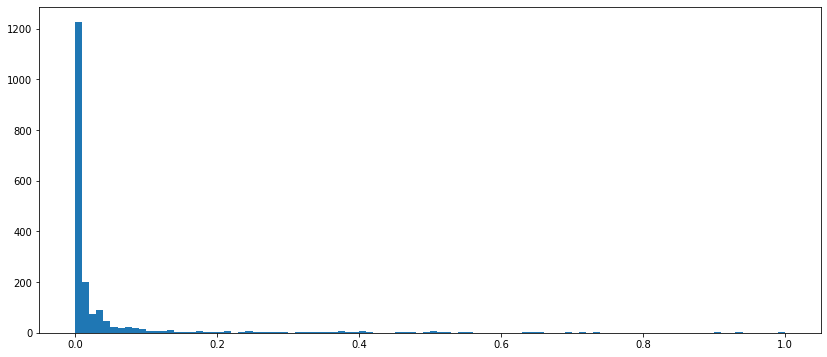

In [27]:
plt.figure(figsize=(14,6))
_ = plt.hist(nunique.astype(float)/X_train.shape[0], bins=100)

Let's take a looks at the features with a huge number of unique values:

In [28]:
mask = (nunique.astype(float)/X_train.shape[0] > 0.8)
X_train.loc[:, mask]

,ID,VAR_0212,VAR_0227,VAR_0228,VAR_0541,VAR_0543,VAR_0704,VAR_0887,VAR_0899,VAR_1081,VAR_1082,VAR_1087,VAR_1179,VAR_1180,VAR_1181,VAR_1495
0,2,NaN,311951.0,311951.0,49463,116783,25619,19214,112871,76857,76857,116783,76857,76857,76857,50000
1,4,92071254434.0,2769488.0,2769488.0,303472,346196,28336,28336,346375,341365,341365,346196,341365,341365,176604,27542
2,5,26547747955.0,654127.0,654127.0,94990,122601,35589,35589,121501,107267,107267,121501,107267,107267,58714,19238
3,7,77575348040.0,3015088.0,3015088.0,20593,59490,5854,5204,61890,45794,47568,59490,45794,47568,47568,29182
4,8,60423773692.0,118678.0,118678.0,10071,35708,2550,2266,34787,20475,23647,34708,20475,23647,23647,23932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,9725,32024058337.0,2913739.0,2913739.0,50054,89996,16555,16555,92321,81099,81099,89996,81099,81099,42321,21348
4996,9730,NaN,1713017.0,1713017.0,227,1000,342,342,500,227,227,1000,227,227,227,2647
4997,9736,24540424313.0,1564676.0,1564676.0,13943,15343,3844,3844,19193,14444,14959,15193,14444,14959,14959,13943
4998,9738,29730445411.0,2400564.0,2400564.0,440,726,577,577,4290,505,505,726,505,505,505,440


The values are not float, they are integer, so these features are likely to be even counts. Let's look at another pack of features.

In [30]:
mask = (nunique.astype(float)/X_train.shape[0] < 0.8) & (nunique.astype(float)/X_train.shape[0] > 0.4)
X_train.loc[:25, mask]

,VAR_0200,VAR_0241,VAR_0293,VAR_0313,VAR_0585,VAR_0609,VAR_0648,VAR_0649,VAR_0652,VAR_0705,...,VAR_1374,VAR_1489,VAR_1494,VAR_1496,VAR_1497,VAR_1801,VAR_1802,VAR_1809,VAR_1810,VAR_1859
0,FT LAUDERDALE,33324.0,0.0,0.0,48233,73627,999999997,999999996,999999996,49463,...,39926,999999997,999999997,999999997,999999997,49463,49463,30537,30537,999999997
1,SANTEE,92071.0,163400.0,163400.0,2407,3502,26051,2805,2625,798,...,2847,32597,33667,27542,11222,5296,5296,2847,2847,2684
2,REEDSVILLE,26547.0,0.0,0.0,999999997,999999997,10161,2116,7071,-99999,...,999999997,12277,22523,15452,11262,999999997,999999997,999999997,999999997,999999997
3,LIBERTY,77575.0,0.0,0.0,236,1903,20593,18802,29182,183,...,14,45508,59190,29182,9865,286,2060,14,14,1774
4,FRANKFORT,60423.0,0.0,0.0,6183,6693,10071,10071,20947,1918,...,3357,10071,20947,20947,20947,10404,13576,3357,3357,568
5,SPRING,77379.0,127200.0,127200.0,412,412,18877,1025,4000,692,...,88,19902,26755,22755,13378,1237,1237,88,88,999999998
6,GRESHAM,97030.0,252970.0,252970.0,999999996,999999996,5818,5818,23665,116,...,157,5818,23665,23665,23665,143,143,157,157,999999997
7,WARNER ROBINS,31098.0,0.0,0.0,999999996,999999996,2961,1015,1544,219,...,150,3976,4681,3137,2341,350,350,150,150,1365
8,SAN ANTONIO,78212.0,68120.0,0.0,999999996,999999996,20359,820,3048,412,...,308,23389,28314,21942,5663,1580,3739,308,308,5209
9,NORRISTOWN,19401.0,0.0,0.0,362,1127,999999996,999999996,999999996,-99999,...,118,999999996,999999996,999999996,999999996,1197,1197,118,118,815


These look like counts too. First thing to notice is the 23th line: 99999.., -99999 values look like NaNs so we should probably built a related feature. Second: the columns are sometimes placed next to each other, so the columns are probably grouped together and we can disentangle that.      

Our conclusion: there are no floating point variables, there are some counts variables, which we will treat as numeric. 

And finally, let's pick one variable (in this case 'VAR_0015') from the third group of features.

In [31]:
X_train['VAR_0015'].value_counts()

0.0     3595
1.0      936
2.0      294
3.0       94
4.0       38
5.0       21
6.0       12
7.0        4
10.0       2
8.0        2
9.0        1
14.0       1
Name: VAR_0015, dtype: int64

In [32]:
cat_cols = list(X_train.select_dtypes(include=['object']).columns)
num_cols = list(X_train.select_dtypes(exclude=['object']).columns)

# Go through

Let's replace NaNs with something first.

In [33]:
X_train.replace('NaN', -999, inplace=True)

Let's calculate how many times one feature is greater than the other and create cross tabel out of it. 

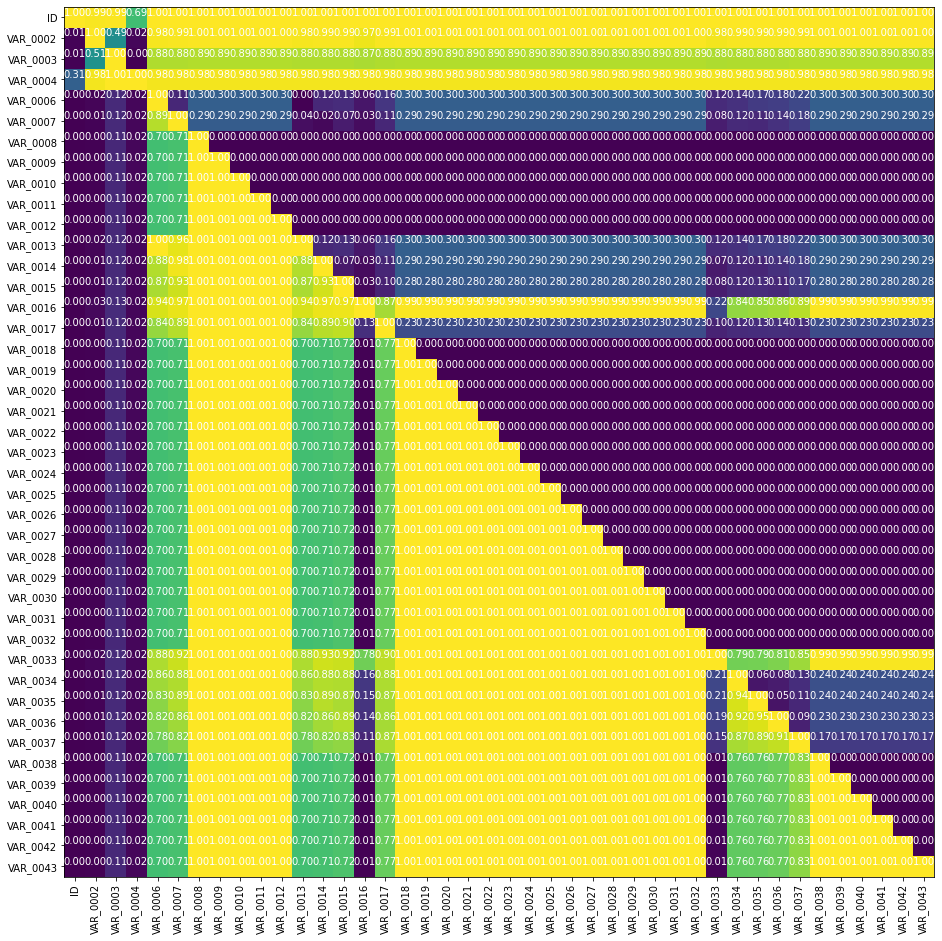

In [36]:
# select first 42 numeric features
feats = num_cols[:42]

# build 'mean(feat1 > feat2)' plot
gt_matrix(feats,16)

Indeed, we see interesting patterns here. There are blocks of geatures where one is strictly greater than the other. So we can hypothesize, that each column correspondes to cumulative counts, e.g. feature number one is counts in first month, second -- total count number in first two month and so on. So we immediately understand what features we should generate to make tree-based models more efficient: the differences between consecutive values.

## VAR_0002, VAR_0003 

AttributeError: 'Rectangle' object has no property 'normed'

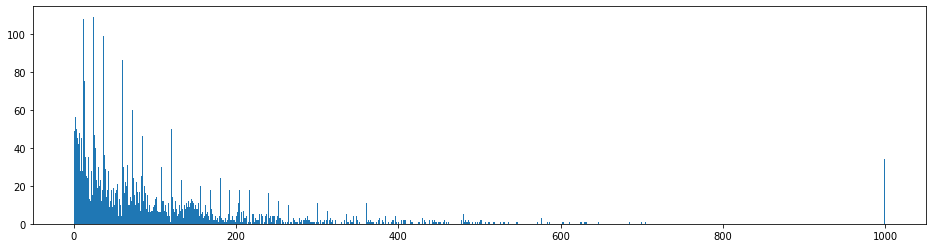

In [40]:
hist_it(X_train['VAR_0002'])
plt.ylim((0,0.05))
plt.xlim((-10,1010))

hist_it(X_train['VAR_0003'])
plt.ylim((0,0.03))
plt.xlim((-10,1010))

In [41]:
X_train['VAR_0002'].value_counts()

12     167
24     157
36     129
13     103
60     103
      ... 
218      1
258      1
262      1
294      1
517      1
Name: VAR_0002, Length: 456, dtype: int64

In [42]:
X_train['VAR_0003'].value_counts()

0      568
24     118
60     112
12     112
36      82
      ... 
369      1
385      1
397      1
413      1
405      1
Name: VAR_0003, Length: 385, dtype: int64

We see there is something special about 12, 24 and so on, sowe can create another feature x mod 12. 

## VAR_0004

AttributeError: 'Rectangle' object has no property 'normed'

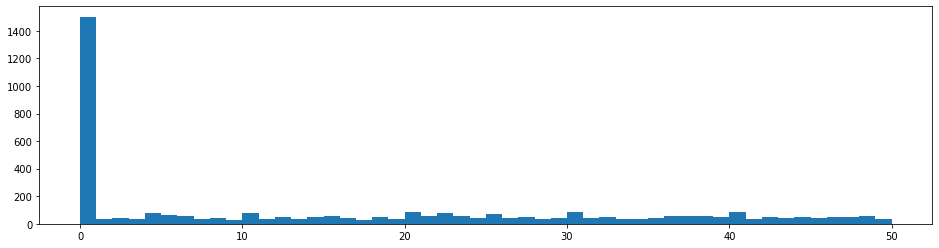

In [44]:
X_train['VAR_0004_mod50'] = X_train['VAR_0004'] % 50
hist_it(X_train['VAR_0004_mod50'])
plt.ylim((0,0.6))

# Categorical features

Let's take a look at categorical features we have.

In [45]:
X_train.loc[:,cat_cols].head().T

,0,1,2,3,4
VAR_0001,H,H,H,H,R
VAR_0005,C,B,C,C,N
VAR_0044,[],[],[],[],[]
VAR_0073,-999,04SEP12:00:00:00,-999,-999,-999
VAR_0074,-999.0,5208.0,-999.0,-999.0,-999.0
...,...,...,...,...,...
VAR_0529,0.0,0.0,0.0,0.0,0.0
VAR_0530,-1.0,-1.0,-1.0,-1.0,-1.0
VAR_0531,201111.0,201210.0,201112.0,201210.0,201110.0
VAR_0840,-999,-999,-999,-999,-999


`VAR_0200`, `VAR_0237`, `VAR_0274` look like some georgraphical data thus one could generate geography related features, we will talk later in the course.

There are some features, that are hard to identify, but look, there a date columns `VAR_0073` -- `VAR_0179`, `VAR_0204`, `VAR_0217`. It is useful to plot one date against another to find relationships. 

In [48]:
date_cols = [u'VAR_0073','VAR_0075',
             u'VAR_0156',u'VAR_0157',u'VAR_0158','VAR_0159',
             u'VAR_0166', u'VAR_0167',u'VAR_0168',u'VAR_0169',
             u'VAR_0176',u'VAR_0177',u'VAR_0178',u'VAR_0179',
             u'VAR_0204',
             u'VAR_0217']

for c in date_cols:
    X_train[c] = pd.to_datetime(X_train[c],format = '%d%b%y:%H:%M:%S')
    X_test[c] = pd.to_datetime(X_test[c],  format = '%d%b%y:%H:%M:%S')

ValueError: time data '-999' does not match format '%d%b%y:%H:%M:%S' (match)

In [49]:
c1 = 'VAR_0217'
c2 = 'VAR_0073'

# mask = (~test[c1].isnull()) & (~test[c2].isnull())
# sc2(test.ix[mask,c1].values,test.ix[mask,c2].values,alpha=0.7,c = 'black')

mask = (~X_train[c1].isnull()) & (~X_train[c2].isnull())
sc2(X_train.loc[mask,c1].values,X_train.loc[mask,c2].values,c=X_train.loc[mask,'target'].values)

NameError: name 'sc2' is not defined

We see that one date is strictly greater than the other, so the difference between them can be a good feature. Also look at horizontal line there -- it also looks like NaN, so I would rather create a new binary feature which will serve as an idicator that our time feature is NaN.